In [1]:
from keras.preprocessing.image import ImageDataGenerator
import cv2
from os import listdir
import time

# Nicely formatted time string to make a note of how much time it takes for augmentation
def hms_string (sec_elapsed):
    h = int(sec_elapsed / (60* 60))
    m = int((sec_elapsed % (60* 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{round(s, 1)}"

def augment_data(file_dir, n_generated_samples, save_to_dir):
    data_gen = ImageDataGenerator (rotation_range=30,width_shift_range=0.1,height_shift_range=0.15,shear_range=0.25,zoom_range = 0.2, horizontal_flip=True,vertical_flip=False,fill_mode='nearest',brightness_range=(0.5,1.2))
    for filename in listdir(file_dir):
        # load the image
        image = cv2.imread(file_dir + '/' +filename)
        # reshape the image
        image = image.reshape((1,)+image.shape)
        # prefix of the names for the generated sampels.
        save_prefix = 'aug_' + filename [:-4]
        # generate 'n_generated_samples sample images
        i=0
        for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir, save_prefix=save_prefix, save_format='jpg'):
            i += 1
            if i > n_generated_samples:
                break
                                   

In [2]:
start_time =time.time()
augmented_data_path = 'C:/TSB Projects/Digital Naturalist/augmented data/'

augment_data("C:/TSB Projects/Digital Naturalist/Digital Naturalist Dataset/Bird/Great Indian Bustard Bird", 8, augmented_data_path+'Bird/GIB_AUG')

augment_data("C:/TSB Projects/Digital Naturalist/Digital Naturalist Dataset/Bird/Spoon Billed Sandpiper Bird", 8, augmented_data_path +'Bird/SPS_AUG')
             
#For MAMMALS
#augnent data for the examples with label equal to GIB in Birds
augment_data('C:/TSB Projects/Digital Naturalist/Digital Naturalist Dataset/Flower/Corpse Flower', 8, augmented_data_path+'Flower/Corpse_AUG')
#augnent data for the examples with label equal to GIB in Birds
augment_data('C:/TSB Projects/Digital Naturalist/Digital Naturalist Dataset/Flower/Lady Slipper Orchid Flower', 8, augmented_data_path+'Flower/LS_Orchid_AUG')
             
#For Flowers
# augnent data for the examples with label equal to GIB in Birds
augment_data('C:/TSB Projects/Digital Naturalist/Digital Naturalist Dataset/Mammal/Pangolin Mammal', 8, augmented_data_path+'Mammal/LS_Pangolin_AUG')
#augment data for the examples with label equal to G18 in Birds
augment_data('C:/TSB Projects/Digital Naturalist/Digital Naturalist Dataset/Mammal/Senenca White Deer Mammal', 8, augmented_data_path+'Mammal/SW_Deer_AUG')
             
end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")

Elapsed time: 0:0:25.5


In [3]:
#For matrix calculations and data Managememnt
import numpy as np

#Importing libraries required for the model
import tensorflow as tf
import keras
import keras.backend as K

from keras.optimizers import SGD, Adam, Adagrad, RMSprop
from keras.applications import *
from keras.preprocessing import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation, BatchNormalization, Dropout
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

#For plotting charts used for data visualizations
import matplotlib.pyplot as plt

#Libraries for Locating and loading data
import glob
from PIL import Image
import os
from os import listdir

In [4]:
#Setting path to our dataset folder
dirName = 'C:/TSB Projects/Digital Naturalist/augmented data'
folders = listdir(dirName)

#Getting the names for all the folders containing data 
def getListOfFiles (dirName):
# create a list of sub directories and files (if any)
# names in the given directory
    listOfFile = os.listdir (dirName)
    allFiles = list()
    for fol_name in listOfFile:
        fullPath = os.path.join(dirName, fol_name) 
        allFiles.append(fullPath)
    return allFiles
Folders = getListOfFiles (dirName)
len (Folders)
subfolders = []
for num in range(len(Folders)):
    sub_fols = getListOfFiles (Folders [num])
    subfolders+=sub_fols
#Now, the subfolders contains the address to all our data folders for each class
subfolders

['C:/TSB Projects/Digital Naturalist/augmented data\\Bird\\GIB_AUG',
 'C:/TSB Projects/Digital Naturalist/augmented data\\Bird\\SPS_AUG',
 'C:/TSB Projects/Digital Naturalist/augmented data\\Flower\\Corpse_AUG',
 'C:/TSB Projects/Digital Naturalist/augmented data\\Flower\\LS_Orchid_AUG',
 'C:/TSB Projects/Digital Naturalist/augmented data\\Mammal\\LS_Pangolin_AUG',
 'C:/TSB Projects/Digital Naturalist/augmented data\\Mammal\\SW_Deer_AUG']

In [5]:
#Loading the data and pre processing it to make it in trainable format
#X data will includes the data generated for each image
#Y data will include a id no, unique for every different species, so are having 6 classes
#there for we will get 6 ids = [0,1,2,3,4,5] #That will be tha label we're classifying.
X_data = []
Y_data = []
id_no=0

#to make a list of tuples, where we'll store the info about the image, category and species
found = []

#itering in all folders under Augmented data folder 
for paths in subfolders:
    #setting folder path for each unique class and category 
    files= glob.glob (paths + "/*.jpg") #adding tuples to the list that contain folder name and subfolder name
    found.append((paths.split('\\')[-2], paths.split('\\')[-1]))
    #itering all files under the folder one by one
    for myFile in files:
        img= Image.open (myFile)
        #img.thumbnail ((width, height), Image.ANTIALIAS) # resizes image in-place keeps ratio 
        img= img.resize((224,224), Image. ANTIALIAS) # resizes image without ratio
        #convert the images to numpy arrays
        img= np.array(img)
        if img.shape == (224, 224, 3):
            # Add the numpy image to matrix with all data
            X_data.append (img) 
            Y_data.append (id_no)
    id_no+=1

C:\Users\rohit\AppData\Local\Temp\ipykernel_22360\455632818.py:21: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img= img.resize((224,224), Image. ANTIALIAS) # resizes image without ratio


In [6]:
#to see our data
print(X_data)
print(Y_data)

#converting lists to np arrays again
X = np.array(X_data)
Y = np.array(Y_data)

# Print shapes to see if they are correct
print("x-shape",X.shape,"y shape",Y.shape)

X = X.astype('float32')/255.0
#The Keras library offers a function called to categorical() 
#integer data. The sequence has an example of all known values 
#so we can use the to_categorical() function directly 
y_cat = to_categorical (Y_data, len(subfolders)) 

print("X shape",X, "y_cat_shape", y_cat)
print("X shape", X.shape, "y_cat shape", y_cat.shape)

#Splitting the data to Test and Train
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2)
print("The model has " + str(len(X_train)) + " inputs")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



x-shape (15102, 224, 224, 3) y shape (15102,)
X shape [[[[0.8117647  0.75686276 0.74509805]
   [0.8117647  0.75686276 0.74509805]
   [0.8117647  0.75686276 0.74509805]
   ...
   [0.8352941  0.78039217 0.76862746]
   [0.8352941  0.78039217 0.76862746]
   [0.8352941  0.78039217 0.76862746]]

  [[0.8117647  0.75686276 0.74509805]
   [0.8117647  0.75686276 0.74509805]
   [0.8117647  0.75686276 0.74509805]
   ...
   [0.8352941  0.78039217 0.76862746]
   [0.8352941  0.78039217 0.76862746]
   [0.8352941  0.78039217 0.76862746]]

  [[0.8117647  0.75686276 0.74509805]
   [0.8117647  0.75686276 0.74509805]
   [0.8117647  0.75686276 0.74509805]
   ...
   [0.8352941  0.78039217 0.76862746]
   [0.8352941  0.78039217 0.76862746]
   [0.8352941  0.78039217 0.76862746]]

  ...

  [[0.3254902  0.45882353 0.6039216 ]
   [0.3254902  0.45882353 0.6039216 ]
   [0.3254902  0.45882353 0.6039216 ]
   ...
   [0.25882354 0.34117648 0.50980395]
   [0.25882354 0.34117648 0.50980395]
   [0.25882354 0.34117648 0.509

In [7]:
#MODEL
#\\
early_stop_loss = EarlyStopping (monitor='loss', patience=3, verbose=1)
early_stop_val_acc = EarlyStopping(monitor = 'val_accuracy', patience=3, verbose=1)
model_callbacks = [early_stop_loss, early_stop_val_acc]


In [8]:
#defining our model, All the layers and configurations
def load_CNN(output_size):
    K.clear_session()
    model = Sequential() 
    model.add(Dropout (0.4, input_shape=(224, 224, 3)))
    
    model.add(Conv2D(256, (5, 5), input_shape=(224, 224, 3), activation='relu')) 
    model.add(MaxPool2D(pool_size=(2, 2)))
    #model.add(BatchNormalization())
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    #model.add(BatchNormalization())
    
    model.add(Conv2D(64, (3, 3), activation='relu')) 
    model.add(MaxPool2D(pool_size=(2, 2)))
    #model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(output_size, activation='softmax'))
    
    return model

In [9]:
#Building a model based on the above defined function 
model = load_CNN (6)
#Number of Columns / Outputs 
model.compile(loss='categorical_crossentropy', optimizer=Adam (lr=0.001), metrics=['accuracy']) 
model.summary() #to print model summary
weights = model.get_weights () #to get the weights from our model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 256)     19456     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        7

C:\Users\rohit\anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
#Fitting the model on different batch sizes to see which ones turns out to be the best
#\
#some arrays to store the result of each model (model trained on each bath size)
histories_acc = []
histories_val_acc = []
histories_loss = []
histories_val_loss = []

model.set_weights(weights)
h=model.fit(X_train, y_train,batch_size=16,epochs=1,verbose=1,callbacks=[early_stop_loss],shuffle=True,validation_data= (X_test, y_test))
model.summary() #to print model summary

756/756 [==============================] - 6975s 9s/step - loss: 1.3196 - accuracy: 0.4324 - val_loss: 1.3316 - val_accuracy: 0.5789
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 256)     19456     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                   

In [11]:
#printing the keys we have for the stores values
print (h.history.keys())
#appendind the data for each epoch in a arr, and for each batch size
histories_acc.append(h.history['accuracy'])
histories_val_acc.append(h.history['val_accuracy'])
histories_loss.append(h.history['loss'])
histories_val_loss.append(h.history['val_loss'])

#converting into numpy arrays
histories_acc = np.array(histories_acc)
histories_val_acc = np.array(histories_val_acc)
histories_loss = np.array(histories_loss) 
histories_val_loss = np.array(histories_val_loss)

#here we have 3 columns and 6 rows each, ever row represetns differnt bath size, 
#every column represent different epoch scores.
print('histories_acc',histories_acc,
      'histories_loss', histories_loss,
      'histories_val_acc', histories_val_acc,
      'histories_val_loss', histories_val_loss)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
histories_acc [[0.43241453]] histories_loss [[1.31960106]] histories_val_acc [[0.57894737]] histories_val_loss [[1.33155096]]


1775


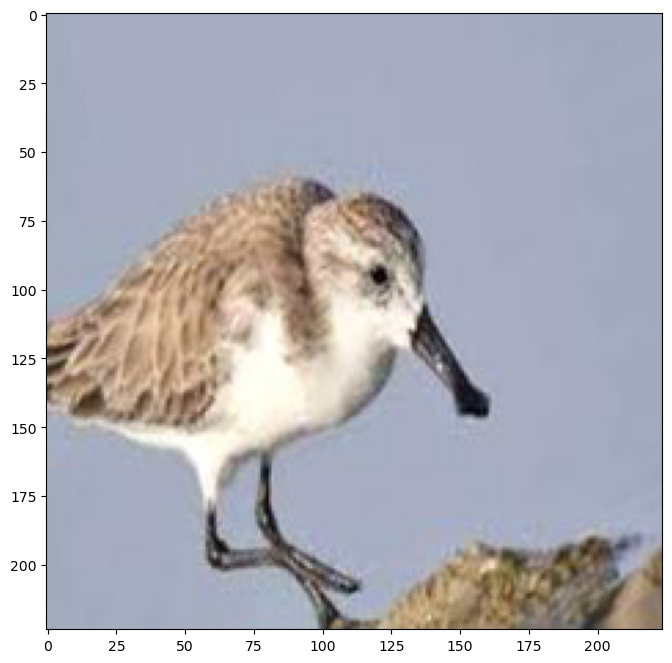

In [12]:
#loading Test Data 
image_number = np.random.randint(0, len(X_test)) 
print(image_number)

#plotting the test image
plt.figure(figsize=(8, 8))
plt.imshow(X_test[image_number])

In [13]:
#\
#savig necessary model files
# serialize model to JSON
model_json = model.to_json() #indent=2 
with open("final_model.json", "w") as json_file: 
    json_file.write(model_json)
    
# serialize weights to H5

model.save_weights("final_model.h5") 
print("Saved model to disk")

Saved model to disk


In [27]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input
predictions = ["Corpse Flower", 
               "Great Indian Bustard Bird", 
               "Lady's Slipper Orchid Flower", 
               "Pangolin Mammal", 
               "Spoon Billed Sandpiper Bird", 
               "Seneca White Deer Mammal"
              ]


path = r"C:\Users\rohit\Downloads\spb.png"
ime = tf.keras.utils.load_img(path,target_size=(224,224))

i = tf.keras.preprocessing.image.img_to_array(ime)
i = preprocess_input(i)
input = np.array([i])
pred = model.predict(input)
predictions[np.argmax(pred)]

1/1 [==============================] - 0s 104ms/step


'Pangolin Mammal'